# Q3.1: Revised Team 22 Project

### Comments received
1. You may consider using geographical features to differentiate the carparks from each other.
Also, instead of using one ML model per carpark, we would recommend to use one model for all carparks.

2. The “web/phone application or integration with established wayfinding applications” is interesting and a good purpose, but it does not suit the theme of this module as much as doing data analysis. Do allocate your time and resources wisely if your team decide to do this.

### Revision of project
Having internalised the comments, we have decided to use a model for all carparks. By comparing 3 models (MLP,LR and LSTM), we will use the final selected model to predict a user-specified carpark availability for the next 24 hours.


### Preamble
With the steadily increasing motor vehicle population in Singapore of 957,006 in 2018 to 988,755 in 2021, parking demand also experiences an upward trend. Parking has become a major traffic issue for not only vehicle owners but also to local authorities in charge of allocating scarce land resources.

### Proposed Solution
In summary, our group wishes to create a carpark recommendation system with the ability to forecast demand. Determining the carpark’s demand at certain timeframes will be done using time-series forecast which utilised historical data to predict future demand trends. This system generally benefits vehicle owners but can be extended to be gain insights into state planning (land allocation for vehicle parking or congestion). 

From a user’s perspective, users could provide the destination (in GPS 
coordinates) and the system will provide the top-n nearest carparks and their respective current available lots. If users were to specify a timeframe in the future, they will be able to view a demand forecast graph (as seen in figure below) in hourly intervals. This feature allows users to plan their trips accordingly to avoid peak demand periods. 

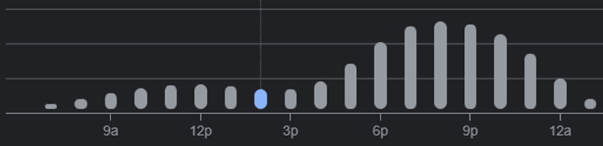


In [2]:
import pandas as pd
import numpy as np

# Data cleaning and preparation

We start by loading data from July to September 2022.

In [3]:
def load_data(month, days=31):
    full_df = pd.read_csv(f"./data/2022-{str(month)}-1.csv")
    for date in range(2, days+1):
        test_df = pd.read_csv(f'./data/2022-{str(month)}-{date}.csv')
        full_df = pd.concat([full_df, test_df])
    full_df['timestamp'] = pd.to_datetime(full_df['timestamp'])
    full_df = full_df.set_index('timestamp')
    return full_df

In [4]:
jul = load_data(7)
aug = load_data(8)
sep = load_data(9, days=30)
full_data = pd.concat([jul, aug, sep])
full_data.dropna(inplace=True)

In [5]:
full_data['available rate'] = full_data['lots_available'] / full_data['total_lots']
full_data.dropna(inplace=True)
grped_full = full_data.groupby(full_data.carpark_number)

In [6]:
# for key, item in grped_full:
#     print(grped_full.get_group(key), "\n\n")

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A10          64              26        C   
2022-07-01 00:30:00            A10          64              26        C   
2022-07-01 00:45:00            A10          64              25        C   
2022-07-01 01:00:00            A10          64              22        C   
2022-07-01 01:15:00            A10          64              23        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A10          62              34        C   
2022-09-30 20:00:00            A10          62              30        C   
2022-09-30 21:00:00            A10          62              36        C   
2022-09-30 22:00:00            A10          62              33        C   
2022-09-30 23:00:00            A10          62              33        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A38         938             417        C   
2022-07-01 00:30:00            A38         938             414        C   
2022-07-01 00:45:00            A38         938             419        C   
2022-07-01 01:00:00            A38         938             415        C   
2022-07-01 01:15:00            A38         938             418        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A38         938             426        C   
2022-09-30 20:00:00            A38         938             405        C   
2022-09-30 21:00:00            A38         938             421        C   
2022-09-30 22:00:00            A38         938             474        C   
2022-09-30 23:00:00            A38         938             465        C   

                     ava


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A88          44               0        C   
2022-07-01 00:30:00            A88          44               0        C   
2022-07-01 00:45:00            A88          44               0        C   
2022-07-01 01:00:00            A88          44               0        C   
2022-07-01 01:15:00            A88          44               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A88          44              10        C   
2022-09-30 20:00:00            A88          44               6        C   
2022-09-30 21:00:00            A88          44               3        C   
2022-09-30 22:00:00            A88          44               0        C   
2022-09-30 23:00:00            A88          44               0        C   

                     av

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           B23M         864             479        C   
2022-07-01 00:30:00           B23M         864             482        C   
2022-07-01 00:45:00           B23M         864             481        C   
2022-07-01 01:00:00           B23M         864             477        C   
2022-07-01 01:15:00           B23M         864             474        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           B23M         864             614        C   
2022-09-30 20:00:00           B23M         864             587        C   
2022-09-30 21:00:00           B23M         864             561        C   
2022-09-30 22:00:00           B23M         864             530        C   
2022-09-30 23:00:00           B23M         864             509        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            B70          41              27        C   
2022-07-01 00:30:00            B70          41              29        C   
2022-07-01 00:45:00            B70          41              27        C   
2022-07-01 01:00:00            B70          41              28        C   
2022-07-01 01:15:00            B70          41              27        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            B70          41              30        C   
2022-09-30 20:00:00            B70          41              23        C   
2022-09-30 21:00:00            B70          41              23        C   
2022-09-30 22:00:00            B70          41              21        C   
2022-09-30 23:00:00            B70          41              20        C   

                     ava

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BE13         220             111        C   
2022-07-01 00:30:00           BE13         220             111        C   
2022-07-01 00:45:00           BE13         220             111        C   
2022-07-01 01:00:00           BE13         220             111        C   
2022-07-01 01:15:00           BE13         220             111        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BE13         220             145        C   
2022-09-30 20:00:00           BE13         220             144        C   
2022-09-30 21:00:00           BE13         220             135        C   
2022-09-30 22:00:00           BE13         220             135        C   
2022-09-30 23:00:00           BE13         220             125        C  

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BJ11         100               1        C   
2022-07-01 00:30:00           BJ11         100               0        C   
2022-07-01 00:45:00           BJ11         100               0        C   
2022-07-01 01:00:00           BJ11         100               0        C   
2022-07-01 01:15:00           BJ11         100               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BJ11         100              35        C   
2022-09-30 20:00:00           BJ11         100              30        C   
2022-09-30 21:00:00           BJ11         100              33        C   
2022-09-30 22:00:00           BJ11         100              26        C   
2022-09-30 23:00:00           BJ11         100              21        C   

                     ava


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BJ52         588             426        C   
2022-07-01 00:30:00           BJ52         588             421        C   
2022-07-01 00:45:00           BJ52         588             422        C   
2022-07-01 01:00:00           BJ52         588             421        C   
2022-07-01 01:15:00           BJ52         588             417        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BJ52         588             443        C   
2022-09-30 20:00:00           BJ52         588             439        C   
2022-09-30 21:00:00           BJ52         588             428        C   
2022-09-30 22:00:00           BJ52         588             425        C   
2022-09-30 23:00:00           BJ52         588             426        C   

                     av

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            BL8         679             319        C   
2022-07-01 00:30:00            BL8         679             327        C   
2022-07-01 00:45:00            BL8         679             339        C   
2022-07-01 01:00:00            BL8         679             336        C   
2022-07-01 01:15:00            BL8         679             337        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            BL8         679              99        C   
2022-09-30 20:00:00            BL8         679             105        C   
2022-09-30 21:00:00            BL8         679             111        C   
2022-09-30 22:00:00            BL8         679             218        C   
2022-09-30 23:00:00            BL8         679             244        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BTM3         360             108        C   
2022-07-01 00:30:00           BTM3         360             108        C   
2022-07-01 00:45:00           BTM3         360             107        C   
2022-07-01 01:00:00           BTM3         360             107        C   
2022-07-01 01:15:00           BTM3         360             106        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BTM3         360             150        C   
2022-09-30 20:00:00           BTM3         360             147        C   
2022-09-30 21:00:00           BTM3         360             154        C   
2022-09-30 22:00:00           BTM3         360             143        C   
2022-09-30 23:00:00           BTM3         360             139        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            CC1          87              87        C   
2022-07-01 00:30:00            CC1          87              87        C   
2022-07-01 00:45:00            CC1          87              87        C   
2022-07-01 01:00:00            CC1          87              87        C   
2022-07-01 01:15:00            CC1          87              87        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            CC1          87              87        C   
2022-09-30 20:00:00            CC1          87              87        C   
2022-09-30 21:00:00            CC1          87              87        C   
2022-09-30 22:00:00            CC1          87              87        C   
2022-09-30 23:00:00            CC1          87              87        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CK41         444             142        C   
2022-07-01 00:30:00           CK41         444             140        C   
2022-07-01 00:45:00           CK41         444             134        C   
2022-07-01 01:00:00           CK41         444             135        C   
2022-07-01 01:15:00           CK41         444             133        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CK41         444             269        C   
2022-09-30 20:00:00           CK41         444             250        C   
2022-09-30 21:00:00           CK41         444             230        C   
2022-09-30 22:00:00           CK41         444             218        C   
2022-09-30 23:00:00           CK41         444             204        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CK9A         372              51        C   
2022-07-01 00:30:00           CK9A         372              49        C   
2022-07-01 00:45:00           CK9A         372              47        C   
2022-07-01 01:00:00           CK9A         372              47        C   
2022-07-01 01:15:00           CK9A         372              45        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CK9A         372             184        C   
2022-09-30 20:00:00           CK9A         372             160        C   
2022-09-30 21:00:00           CK9A         372             132        C   
2022-09-30 22:00:00           CK9A         372             100        C   
2022-09-30 23:00:00           CK9A         372              85        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           DSRL         100               0        C   
2022-07-01 00:15:00           DSRL         100               0        Y   
2022-07-01 00:30:00           DSRL         100               0        C   
2022-07-01 00:45:00           DSRL         100               0        C   
2022-07-01 01:00:00           DSRL         100               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           DSRL           6               4        C   
2022-09-30 20:00:00           DSRL           6               4        C   
2022-09-30 21:00:00           DSRL           6               4        C   
2022-09-30 22:00:00           DSRL           6               4        C   
2022-09-30 23:00:00           DSRL           6               4        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            GSM         200              13        C   
2022-07-01 00:30:00            GSM         200              13        C   
2022-07-01 00:45:00            GSM         200              11        C   
2022-07-01 01:00:00            GSM         200              11        C   
2022-07-01 01:15:00            GSM         200              10        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            GSM         200              69        C   
2022-09-30 20:00:00            GSM         200              83        C   
2022-09-30 21:00:00            GSM         200              71        C   
2022-09-30 22:00:00            GSM         200              47        C   
2022-09-30 23:00:00            GSM         200              37        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG2A         408             133        C   
2022-07-01 00:30:00           HG2A         408             131        C   
2022-07-01 00:45:00           HG2A         408             129        C   
2022-07-01 01:00:00           HG2A         408             127        C   
2022-07-01 01:15:00           HG2A         408             125        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG2A         408             242        C   
2022-09-30 20:00:00           HG2A         408             230        C   
2022-09-30 21:00:00           HG2A         408             195        C   
2022-09-30 22:00:00           HG2A         408             169        C   
2022-09-30 23:00:00           HG2A         408             153        C   

                     ava

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG75         823             584        C   
2022-07-01 00:30:00           HG75         823             581        C   
2022-07-01 00:45:00           HG75         823             580        C   
2022-07-01 01:00:00           HG75         823             581        C   
2022-07-01 01:15:00           HG75         823             579        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG75         823             697        C   
2022-09-30 20:00:00           HG75         823             677        C   
2022-09-30 21:00:00           HG75         823             673        C   
2022-09-30 22:00:00           HG75         823             648        C   
2022-09-30 23:00:00           HG75         823             626        C  

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            J24          34              16        C   
2022-07-01 00:30:00            J24          34              14        C   
2022-07-01 00:45:00            J24          34              15        C   
2022-07-01 01:00:00            J24          34              16        C   
2022-07-01 01:15:00            J24          34              17        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            J24          34               3        C   
2022-09-30 20:00:00            J24          34               2        C   
2022-09-30 21:00:00            J24          34               6        C   
2022-09-30 22:00:00            J24          34               5        C   
2022-09-30 23:00:00            J24          34              14        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            J66          77              47        C   
2022-07-01 00:30:00            J66          77              46        C   
2022-07-01 00:45:00            J66          77              47        C   
2022-07-01 01:00:00            J66          77              46        C   
2022-07-01 01:15:00            J66          77              44        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            J66          77               6        C   
2022-09-30 20:00:00            J66          77              12        C   
2022-09-30 21:00:00            J66          77              24        C   
2022-09-30 22:00:00            J66          77              52        C   
2022-09-30 23:00:00            J66          77              51        C   

                     ava


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            JBM         342             220        C   
2022-07-01 00:30:00            JBM         342             218        C   
2022-07-01 00:45:00            JBM         342             215        C   
2022-07-01 01:00:00            JBM         342             214        C   
2022-07-01 01:15:00            JBM         342             214        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            JBM         342             265        C   
2022-09-30 20:00:00            JBM         342             249        C   
2022-09-30 21:00:00            JBM         342             245        C   
2022-09-30 22:00:00            JBM         342             227        C   
2022-09-30 23:00:00            JBM         342             218        C   

                     av

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            JRM         280             153        C   
2022-07-01 00:30:00            JRM         280             155        C   
2022-07-01 00:45:00            JRM         280             150        C   
2022-07-01 01:00:00            JRM         280             152        C   
2022-07-01 01:15:00            JRM         280             152        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            JRM         280             104        C   
2022-09-30 20:00:00            JRM         280             107        C   
2022-09-30 21:00:00            JRM         280             120        C   
2022-09-30 22:00:00            JRM         280             130        C   
2022-09-30 23:00:00            JRM         280             150        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            KM3         535             370        C   
2022-07-01 00:30:00            KM3         535             370        C   
2022-07-01 00:45:00            KM3         535             370        C   
2022-07-01 01:00:00            KM3         535             370        C   
2022-07-01 01:15:00            KM3         535             370        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            KM3         535             330        C   
2022-09-30 20:00:00            KM3         535             330        C   
2022-09-30 21:00:00            KM3         535             330        C   
2022-09-30 22:00:00            KM3         535             330        C   
2022-09-30 23:00:00            KM3         535             330        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           MP12         220              81        C   
2022-07-01 00:30:00           MP12         220              77        C   
2022-07-01 00:45:00           MP12         220              76        C   
2022-07-01 01:00:00           MP12         220              73        C   
2022-07-01 01:15:00           MP12         220              72        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           MP12         220              49        C   
2022-09-30 20:00:00           MP12         220              51        C   
2022-09-30 21:00:00           MP12         220              65        C   
2022-09-30 22:00:00           MP12         220              82        C   
2022-09-30 23:00:00           MP12         220              80        C   

                     ava

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           P34L          80               0        C   
2022-07-01 00:30:00           P34L          80               0        C   
2022-07-01 00:45:00           P34L          80               0        C   
2022-07-01 01:00:00           P34L          80               0        C   
2022-07-01 01:15:00           P34L          80               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           P34L          80               0        C   
2022-09-30 20:00:00           P34L          80               0        C   
2022-09-30 21:00:00           P34L          80               0        C   
2022-09-30 22:00:00           P34L          80              44        C   
2022-09-30 23:00:00           P34L          80              26        C  

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PL15         277              85        C   
2022-07-01 00:30:00           PL15         277              86        C   
2022-07-01 00:45:00           PL15         277              83        C   
2022-07-01 01:00:00           PL15         277              82        C   
2022-07-01 01:15:00           PL15         277              80        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PL15         277             146        C   
2022-09-30 20:00:00           PL15         277             138        C   
2022-09-30 21:00:00           PL15         277             131        C   
2022-09-30 22:00:00           PL15         277             130        C   
2022-09-30 23:00:00           PL15         277             112        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PL59         669             160        C   
2022-07-01 00:30:00           PL59         669             158        C   
2022-07-01 00:45:00           PL59         669             155        C   
2022-07-01 01:00:00           PL59         669             157        C   
2022-07-01 01:15:00           PL59         669             155        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PL59         669             306        C   
2022-09-30 20:00:00           PL59         669             249        C   
2022-09-30 21:00:00           PL59         669             233        C   
2022-09-30 22:00:00           PL59         669             236        C   
2022-09-30 23:00:00           PL59         669             232        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PM32         453             153        C   
2022-07-01 00:30:00           PM32         453             153        C   
2022-07-01 00:45:00           PM32         453             151        C   
2022-07-01 01:00:00           PM32         453             143        C   
2022-07-01 01:15:00           PM32         453             140        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PM32         453             273        C   
2022-09-30 20:00:00           PM32         453             263        C   
2022-09-30 21:00:00           PM32         453             239        C   
2022-09-30 22:00:00           PM32         453             219        C   
2022-09-30 23:00:00           PM32         453             201        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            Q67          78              54        C   
2022-07-01 00:30:00            Q67          78              53        C   
2022-07-01 00:45:00            Q67          78              54        C   
2022-07-01 01:00:00            Q67          78              55        C   
2022-07-01 01:15:00            Q67          78              55        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            Q67          81              54        C   
2022-09-30 20:00:00            Q67          81              54        C   
2022-09-30 21:00:00            Q67          81              54        C   
2022-09-30 22:00:00            Q67          81              54        C   
2022-09-30 23:00:00            Q67          81              54        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           S116         227              97        C   
2022-07-01 00:30:00           S116         227              96        C   
2022-07-01 00:45:00           S116         227              96        C   
2022-07-01 01:00:00           S116         227              98        C   
2022-07-01 01:15:00           S116         227             101        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           S116         227             153        C   
2022-09-30 20:00:00           S116         227             141        C   
2022-09-30 21:00:00           S116         227             124        C   
2022-09-30 22:00:00           S116         227             105        C   
2022-09-30 23:00:00           S116         227              98        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SB38         666             301        C   
2022-07-01 00:30:00           SB38         666             297        C   
2022-07-01 00:45:00           SB38         666             292        C   
2022-07-01 01:00:00           SB38         666             290        C   
2022-07-01 01:15:00           SB38         666             289        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SB38         666             512        C   
2022-09-30 20:00:00           SB38         666             449        C   
2022-09-30 21:00:00           SB38         666             424        C   
2022-09-30 22:00:00           SB38         666             391        C   
2022-09-30 23:00:00           SB38         666             349        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SE35         300              71        C   
2022-07-01 00:30:00           SE35         300              73        C   
2022-07-01 00:45:00           SE35         300              73        C   
2022-07-01 01:00:00           SE35         300              71        C   
2022-07-01 01:15:00           SE35         300              74        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SE35         300             145        C   
2022-09-30 20:00:00           SE35         300             126        C   
2022-09-30 21:00:00           SE35         300             114        C   
2022-09-30 22:00:00           SE35         300              93        C   
2022-09-30 23:00:00           SE35         300              73        C   

                     ava

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK14         445             228        C   
2022-07-01 00:30:00           SK14         445             226        C   
2022-07-01 00:45:00           SK14         445             225        C   
2022-07-01 01:00:00           SK14         445             223        C   
2022-07-01 01:15:00           SK14         445             223        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK14         445             317        C   
2022-09-30 20:00:00           SK14         445             297        C   
2022-09-30 21:00:00           SK14         445             288        C   
2022-09-30 22:00:00           SK14         445             269        C   
2022-09-30 23:00:00           SK14         445             257        C  

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK49         485             279        C   
2022-07-01 00:30:00           SK49         485             277        C   
2022-07-01 00:45:00           SK49         485             277        C   
2022-07-01 01:00:00           SK49         485             274        C   
2022-07-01 01:15:00           SK49         485             274        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK49         485             358        C   
2022-09-30 20:00:00           SK49         485             355        C   
2022-09-30 21:00:00           SK49         485             338        C   
2022-09-30 22:00:00           SK49         485             321        C   
2022-09-30 23:00:00           SK49         485             299        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK89         492             292        C   
2022-07-01 00:30:00           SK89         492             292        C   
2022-07-01 00:45:00           SK89         492             290        C   
2022-07-01 01:00:00           SK89         492             288        C   
2022-07-01 01:15:00           SK89         492             288        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK89         401             191        C   
2022-09-30 20:00:00           SK89         401             191        C   
2022-09-30 21:00:00           SK89         401             191        C   
2022-09-30 22:00:00           SK89         401             191        C   
2022-09-30 23:00:00           SK89         401             191        C   

                     ava

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            T32         645             201        C   
2022-07-01 00:30:00            T32         645             197        C   
2022-07-01 00:45:00            T32         645             197        C   
2022-07-01 01:00:00            T32         645             190        C   
2022-07-01 01:15:00            T32         645             192        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            T32         645             317        C   
2022-09-30 20:00:00            T32         645             313        C   
2022-09-30 21:00:00            T32         645             302        C   
2022-09-30 22:00:00            T32         645             273        C   
2022-09-30 23:00:00            T32         645             240        C  

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TB17         366              75        C   
2022-07-01 00:30:00           TB17         366              75        C   
2022-07-01 00:45:00           TB17         366              75        C   
2022-07-01 01:00:00           TB17         366              75        C   
2022-07-01 01:15:00           TB17         366              75        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TB17         366             126        C   
2022-09-30 20:00:00           TB17         366             102        C   
2022-09-30 21:00:00           TB17         366             102        C   
2022-09-30 22:00:00           TB17         366              92        C   
2022-09-30 23:00:00           TB17         366              76        C  

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TGM3         553             169        C   
2022-07-01 00:30:00           TGM3         553             169        C   
2022-07-01 00:45:00           TGM3         553             170        C   
2022-07-01 01:00:00           TGM3         553             170        C   
2022-07-01 01:15:00           TGM3         553             168        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TGM3         553             329        C   
2022-09-30 20:00:00           TGM3         553             316        C   
2022-09-30 21:00:00           TGM3         553             292        C   
2022-09-30 22:00:00           TGM3         553             278        C   
2022-09-30 23:00:00           TGM3         553             240        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TM30         408             170        C   
2022-07-01 00:30:00           TM30         408             169        C   
2022-07-01 00:45:00           TM30         408             165        C   
2022-07-01 01:00:00           TM30         408             163        C   
2022-07-01 01:15:00           TM30         408             163        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TM30         408             280        C   
2022-09-30 20:00:00           TM30         408             265        C   
2022-09-30 21:00:00           TM30         408             244        C   
2022-09-30 22:00:00           TM30         408             234        C   
2022-09-30 23:00:00           TM30         408             210        C   

                     ava

[6595 rows x 5 columns] 


                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TP3A         200              37        C   
2022-07-01 00:30:00           TP3A         200              39        C   
2022-07-01 00:45:00           TP3A         200              36        C   
2022-07-01 01:00:00           TP3A         200              34        C   
2022-07-01 01:15:00           TP3A         200              34        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TP3A         200              83        C   
2022-09-30 20:00:00           TP3A         200              80        C   
2022-09-30 21:00:00           TP3A         200              73        C   
2022-09-30 22:00:00           TP3A         200              73        C   
2022-09-30 23:00:00           TP3A         200              67        C  

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            TW1         108               7        C   
2022-07-01 00:30:00            TW1         108               7        C   
2022-07-01 00:45:00            TW1         108               6        C   
2022-07-01 01:00:00            TW1         108               5        C   
2022-07-01 01:15:00            TW1         108               6        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            TW1         108              34        C   
2022-09-30 20:00:00            TW1         108              25        C   
2022-09-30 21:00:00            TW1         108              15        C   
2022-09-30 22:00:00            TW1         108              23        C   
2022-09-30 23:00:00            TW1         108              14        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            U50          37              29        C   
2022-07-01 00:30:00            U50          37              29        C   
2022-07-01 00:45:00            U50          37              29        C   
2022-07-01 01:00:00            U50          37              29        C   
2022-07-01 01:15:00            U50          37              29        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            U50          37              26        C   
2022-09-30 20:00:00            U50          37              27        C   
2022-09-30 21:00:00            U50          37              23        C   
2022-09-30 22:00:00            U50          37              24        C   
2022-09-30 23:00:00            U50          37              27        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W15         137             111        C   
2022-07-01 00:30:00            W15         137             111        C   
2022-07-01 00:45:00            W15         137             111        C   
2022-07-01 01:00:00            W15         137             111        C   
2022-07-01 01:15:00            W15         137             111        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W15         137             111        C   
2022-09-30 20:00:00            W15         137             111        C   
2022-09-30 21:00:00            W15         137             111        C   
2022-09-30 22:00:00            W15         137             111        C   
2022-09-30 23:00:00            W15         137             111        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W57         483             164        C   
2022-07-01 00:30:00            W57         483             164        C   
2022-07-01 00:45:00            W57         483             163        C   
2022-07-01 01:00:00            W57         483             163        C   
2022-07-01 01:15:00            W57         483             163        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W57         483             285        C   
2022-09-30 20:00:00            W57         483             257        C   
2022-09-30 21:00:00            W57         483             216        C   
2022-09-30 22:00:00            W57         483             204        C   
2022-09-30 23:00:00            W57         483             184        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W93         447             293        C   
2022-07-01 00:30:00            W93         447             296        C   
2022-07-01 00:45:00            W93         447             296        C   
2022-07-01 01:00:00            W93         447             296        C   
2022-07-01 01:15:00            W93         447             295        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W93         447             337        C   
2022-09-30 20:00:00            W93         447             323        C   
2022-09-30 21:00:00            W93         447             319        C   
2022-09-30 22:00:00            W93         447             313        C   
2022-09-30 23:00:00            W93         447             309        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           Y48M         257             159        C   
2022-07-01 00:30:00           Y48M         257             157        C   
2022-07-01 00:45:00           Y48M         257             157        C   
2022-07-01 01:00:00           Y48M         257             156        C   
2022-07-01 01:15:00           Y48M         257             156        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           Y48M         257             211        C   
2022-09-30 20:00:00           Y48M         257             200        C   
2022-09-30 21:00:00           Y48M         257             186        C   
2022-09-30 22:00:00           Y48M         257             177        C   
2022-09-30 23:00:00           Y48M         257             174        C   

                     ava

For each carpark, we use the first 70% as training data and last 30% as testing data. We will use previous 8*24 hours availability as features to predict the next 24 hours availability.
We slice out the data for each carpark and resample them to fill in missing values. Then we prepare training and testing features and labels.

In [7]:
# helper method to create inputs and outputs from a given dataset
def prep_train_test(dataset, feature_len):
    X = []
    Y = []
    for i in range(feature_len, len(dataset)-24):
        X.append(dataset['available rate'][i-feature_len:i].values)
        Y.append(dataset['available rate'][i:i+24].values)
        # if np.isnan(X[-1]).any():
        #     print(X[-1])
        # if np.isnan(Y[-1]).any():
        #     print(Y[-1])
    return X, Y

In [8]:
carparks = grped_full.carpark_number.unique()
print(carparks)
trainX, trainY = [], []
testX, testY = [], []
feature_len = 24*8
split = 0.3
print("total ids:", len(carparks))
index = 0
for id in carparks:
    slice = grped_full.get_group(id[0])
    slice = slice.resample('1h').mean()
    if slice.shape[0] != 2208:
        print(slice.shape[0])
        print("Lossy data. Dropped")
        continue
    if slice.isnull().values.any():
        slice.fillna(method='ffill', inplace=True)
    split_index = int(slice.shape[0] * split)
    X_train1, Y_train1 = prep_train_test(slice[:split_index], feature_len)
    X_test1, Y_test1 = prep_train_test(slice[split_index:], feature_len)
    trainX.extend(X_train1)
    trainY.extend(Y_train1)
    testX.extend(X_test1)
    testY.extend(Y_test1)
    index += 1
    if index % 100 == 0:
        print(index, "done")
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)


carpark_number
A10      [A10]
A100    [A100]
A11      [A11]
A12      [A12]
A13      [A13]
         ...  
Y78M    [Y78M]
Y8        [Y8]
Y82M    [Y82M]
Y9        [Y9]
YHS      [YHS]
Name: carpark_number, Length: 1965, dtype: object
total ids: 1965
855
Lossy data. Dropped
100 done
200 done
300 done
400 done
500 done
730
Lossy data. Dropped
730
Lossy data. Dropped
600 done
700 done
800 done
900 done
1000 done
1100 done
83
Lossy data. Dropped
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done


In [9]:
display(testY)

array([[0.6640625 , 0.625     , 0.625     , ..., 0.40234375, 0.4140625 ,
        0.42578125],
       [0.625     , 0.625     , 0.6171875 , ..., 0.4140625 , 0.42578125,
        0.48046875],
       [0.625     , 0.6171875 , 0.5078125 , ..., 0.42578125, 0.48046875,
        0.4609375 ],
       ...,
       [0.328125  , 0.328125  , 0.328125  , ..., 0.328125  , 0.55497159,
        0.328125  ],
       [0.328125  , 0.328125  , 0.328125  , ..., 0.55497159, 0.328125  ,
        0.328125  ],
       [0.328125  , 0.328125  , 0.328125  , ..., 0.328125  , 0.328125  ,
        0.328125  ]])

In [10]:
print("train test length:", trainX.shape, trainY.shape)
print("testing test length:", testX.shape, testY.shape)
print("input shape:", trainX[0].shape)
print("output shape:", trainY[0].shape)

train test length: (874606, 192) (874606, 24)
testing test length: (2608130, 192) (2608130, 24)
input shape: (192,)
output shape: (24,)


# Finding the best model
The following section shows the deliberation behind the decision of the final model. This is an extension of question 2 where we have found the linear regression model to be the best performing out of the 3 pre-selected models with Support Vector Regressor and Decision Tree Regressor models as the alternatives. Here, we have experimented with Multi-layer Perceptron(MLP) and Long Short-Term Memory(LSTM) models to arrive at our final decided model used in our simulated application where users can see the predicted availability of a carpark.

# Model 1: Multi-layer perceptron (MLP)

### In this section, we will use MLP model to predict the parking availability within the next 24 hours

In [11]:
# Import libraries
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
plt.style.use('ggplot')


In [12]:
## Q3 data
print(trainX.dtype,trainY.dtype)
print(testX.dtype,testY.dtype)
print(np.isnan(trainX).any() ,np.isnan(trainY).any())
print(np.isnan(testX).any() ,np.isnan(testY).any())
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

float64 float64
float64 float64
False False
False False
(874606, 192) (874606, 24)
(2608130, 192) (2608130, 24)


#### MLP regressor

In [17]:
#Train the data with MLP regressor
model = MLPRegressor(activation='identity', hidden_layer_sizes=(200),
             max_iter=50, solver='adam', verbose=True, early_stopping=True)
model.fit(trainX, trainY)
print(model)

Iteration 1, loss = 0.00418836
Validation score: 0.940737
Iteration 2, loss = 0.00288848
Validation score: 0.949134
Iteration 3, loss = 0.00267772
Validation score: 0.948567
Iteration 4, loss = 0.00267973
Validation score: 0.950174
Iteration 5, loss = 0.00261132
Validation score: 0.945210
Iteration 6, loss = 0.00261738
Validation score: 0.951108
Iteration 7, loss = 0.00260606
Validation score: 0.951779
Iteration 8, loss = 0.00259832
Validation score: 0.947916
Iteration 9, loss = 0.00259573
Validation score: 0.951116
Iteration 10, loss = 0.00258448
Validation score: 0.951511
Iteration 11, loss = 0.00258383
Validation score: 0.950945
Iteration 12, loss = 0.00258065
Validation score: 0.950467
Iteration 13, loss = 0.00257706
Validation score: 0.951384
Iteration 14, loss = 0.00257214
Validation score: 0.951156
Iteration 15, loss = 0.00257253
Validation score: 0.951706
Iteration 16, loss = 0.00256137
Validation score: 0.951554
Iteration 17, loss = 0.00256616
Validation score: 0.951696
Iterat

In [18]:
# Saving the model
import pickle
filename = 'models/mlp_sklearn_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [19]:
# Loading the model
import pickle
model = pickle.load(open(filename, 'rb'))
Y_pred = model.predict(testX)

In [20]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

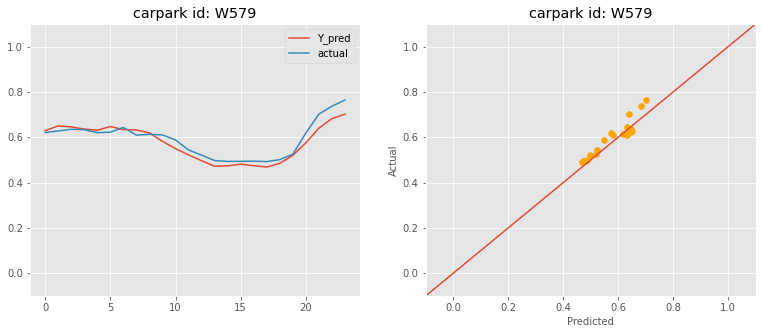

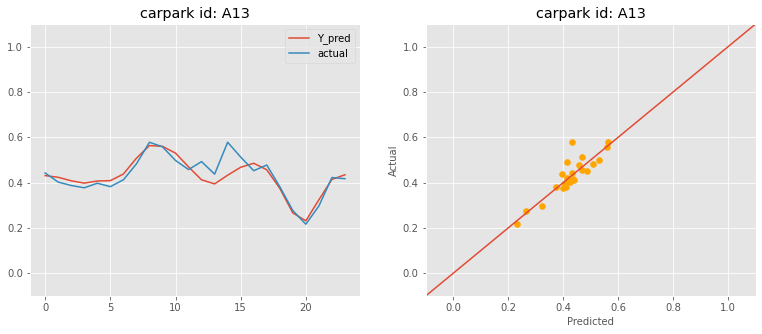

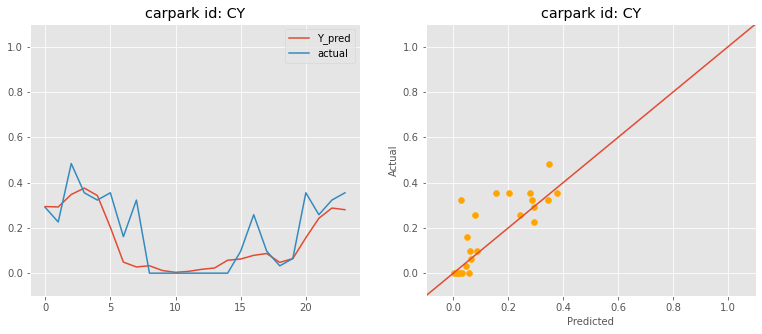

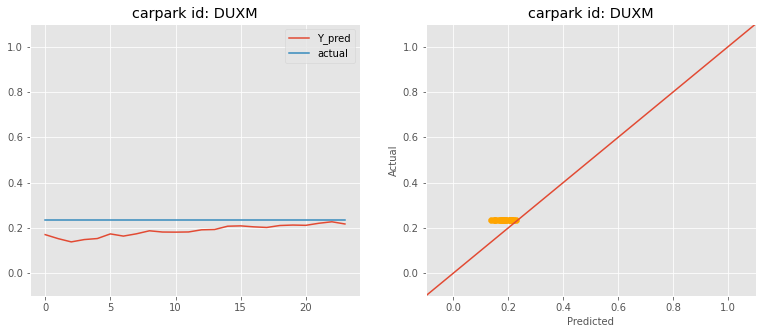

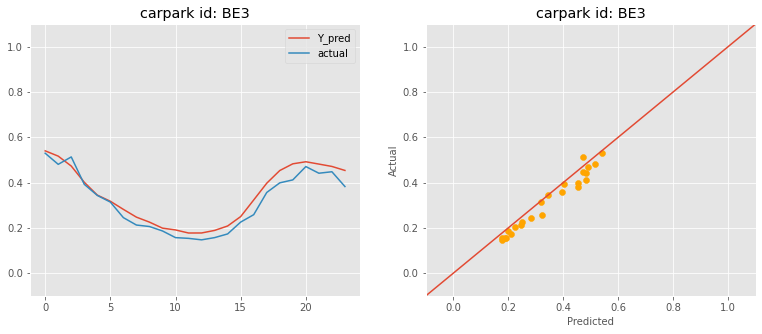

In [22]:
import random
for idx in range(5):
    idx = random.randint(0, len(testX))
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(idx)}" )
    plt.plot(Y_pred[idx], label='Y_pred')
    plt.plot(testY[idx], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(idx)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(Y_pred[idx], testY[idx], label='Y_pred', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

### General Performance
From the statistic below, The MLP model has a very high R Square value of 0.9476 which indicates a good fit between predicted and actual value. It means that the output's variance can be very well explained by the variance in the input features.

The percentage error at 4.13% means that the predicted values are very close to the actual values.

From these metrics, it can be seen that MLP is a fairly good model for this data distribution.

From the randomly selected scatter plots, we can see that the points are all very close to the line y=x, which means that the predicted availability is very close to the actual availability.

Thus, based on above evidence, the model is a good fit for our distribution. We have established that MLP model is a good fit from Q2 and the above substantiation.

In [23]:
mlp_r2 = metrics.r2_score(testY, Y_pred)
mlp_mse = metrics.mean_squared_error(testY, Y_pred)
mlp_abs_error = mean_absolute_error(testY, Y_pred)
print(f"Model's r2score: {mlp_r2},\nMSE: {mlp_mse},\nMean Absolute Error: {mlp_abs_error*100} %")

Model's r2score: 0.9473312305323413,
MSE: 0.005664635998041362,
Mean Absolute Error: 4.192837305999196 %


## Error across time
Next we try to see how the performance of the model changes according to the prediction hours in future. This is done by plotting the performance metrics - r2score, mean squared error and mean absolute error, accross hours of prediction.

From the graph below, we can see that the model performs very well in the short run. Even though the MSE and MAE increases with prediction hours, the error peak is still within an acceptable range. The R2 score is around 0.93 at 24 hours which still indicates a good fit between actual and predicted values. Overall, the predictions are extremely accurate for the next 24hrs with its accuracy slowly dwindling

Text(0.5, 0, 'Hour')

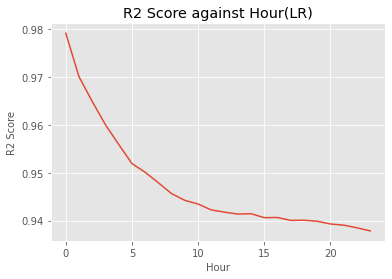

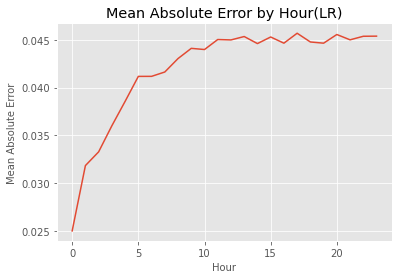

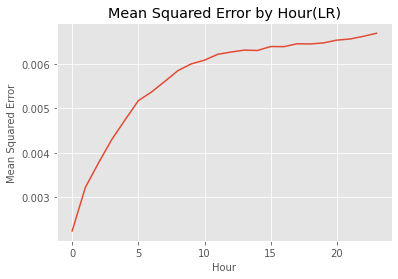

In [24]:
mlp_r2_ls = []
mlp_mse_ls = []
mlp_abs_error_ls = []
for i in range (24):
    mlp_r2_ls.append(metrics.r2_score(testY.transpose()[i], Y_pred.transpose()[i]))
    mlp_mse_ls.append(metrics.mean_squared_error(testY.transpose()[i], Y_pred.transpose()[i]))
    mlp_abs_error_ls.append(mean_absolute_error(testY.transpose()[i], Y_pred.transpose()[i]))
plt.figure()
plt.plot(mlp_r2_ls)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)

plt.figure()
plt.plot(mlp_abs_error_ls)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)

plt.figure()
plt.plot(mlp_mse_ls)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)



# Model 2: Linear Regression

In this section, we will use Linear Regression model to predict the parking availability of the next 24 hours. From Q2, we have established that LR model is has generally a better performance than SVR and DT. Here, we will investigate if it has better performance that MLP and LSTM.

First, we fit our LR model with the trainX and trainY. The training and test sets are derived from the original data set with a ratio of 70%:30% respectively.

In [25]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(trainX, trainY)

LinearRegression()

The following kernel is such that the train model will be saved for future runs (assuming training set remains the same).

In [26]:
# Saving the model
import pickle
pickle.dump(model_lr, open(filename, 'wb'))

In [27]:
# Loading the saved model
filename = 'models/lr_sklearn_model.sav'
model_lr = pickle.load(open(filename, 'rb'))
y_pred_lr = model_lr.predict(testX)
display(trainX)

array([[0.40104167, 0.33984375, 0.328125  , ..., 0.5859375 , 0.5625    ,
        0.51953125],
       [0.33984375, 0.328125  , 0.328125  , ..., 0.5625    , 0.51953125,
        0.46875   ],
       [0.328125  , 0.328125  , 0.32421875, ..., 0.51953125, 0.46875   ,
        0.453125  ],
       ...,
       [0.43772727, 0.43772727, 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ],
       [0.43772727, 0.40625   , 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ],
       [0.40625   , 0.40625   , 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ]])

In [28]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

This section will randomly select 10 carparks and display the actual and predicted data for the time frame. This is solely for visualisation purposes. 

randomList: [1355498, 2576026, 597905, 412562, 2176812, 572033, 1434943, 402212, 222392, 2388196]


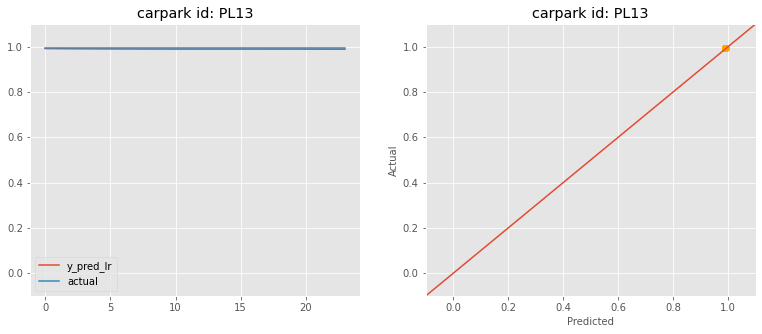

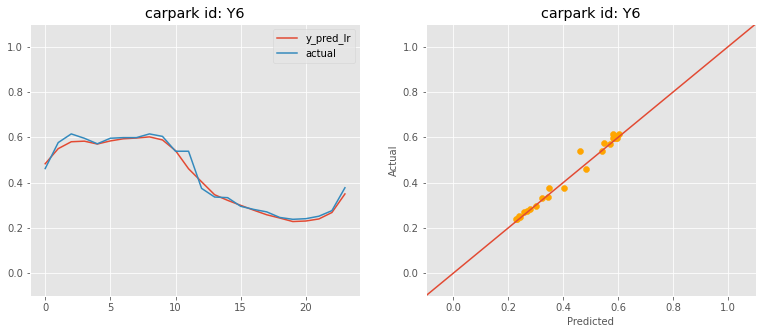

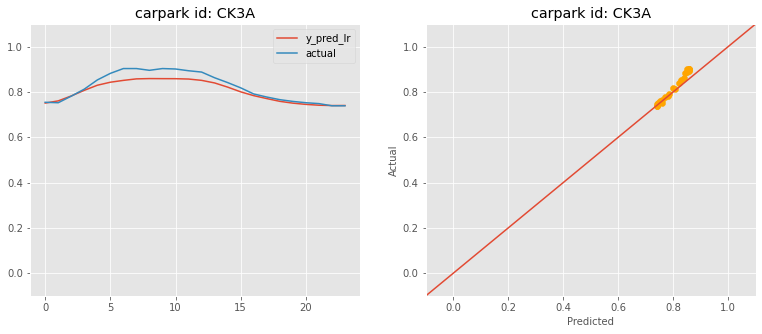

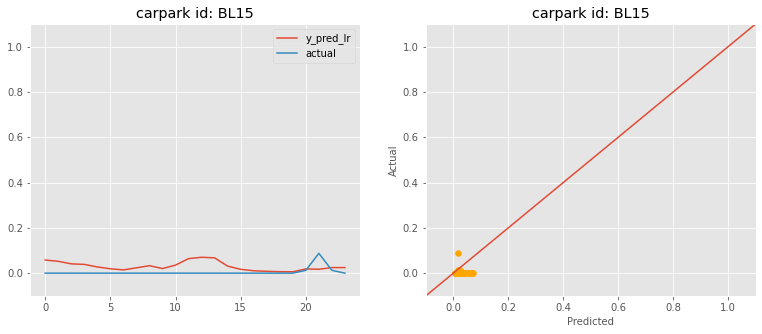

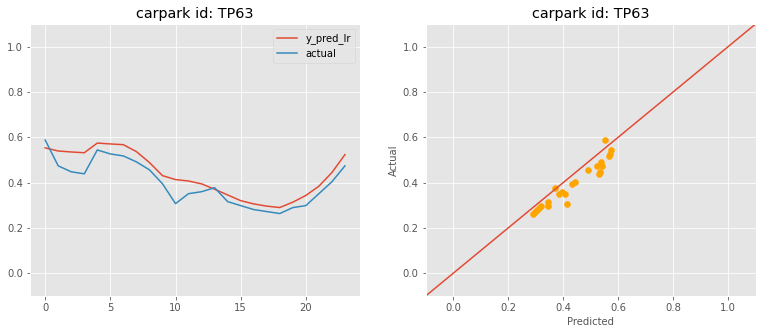

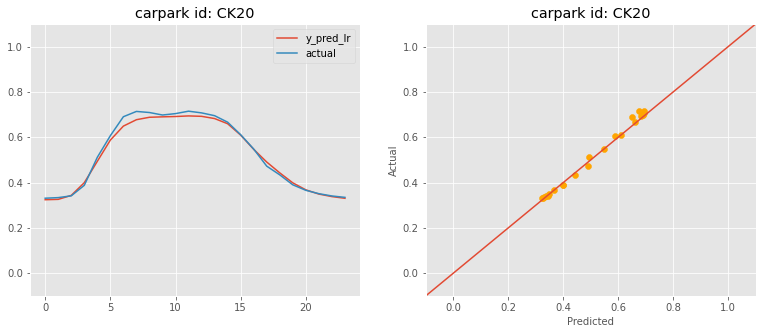

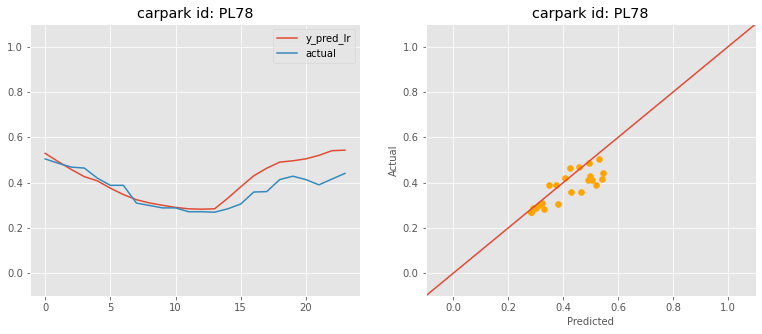

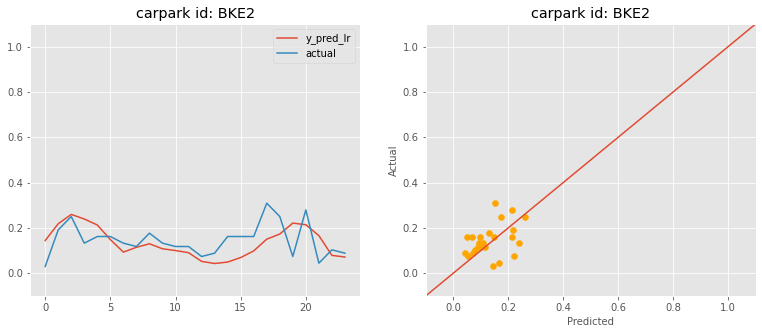

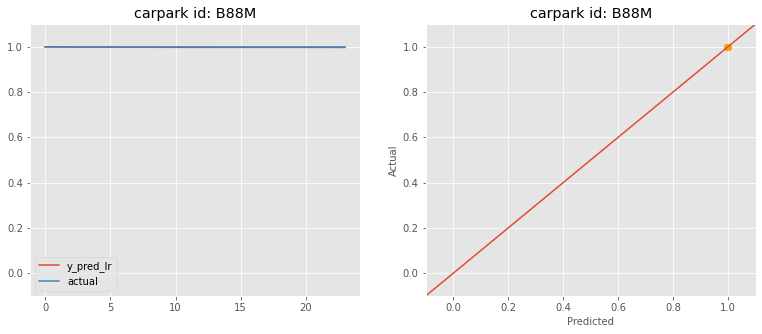

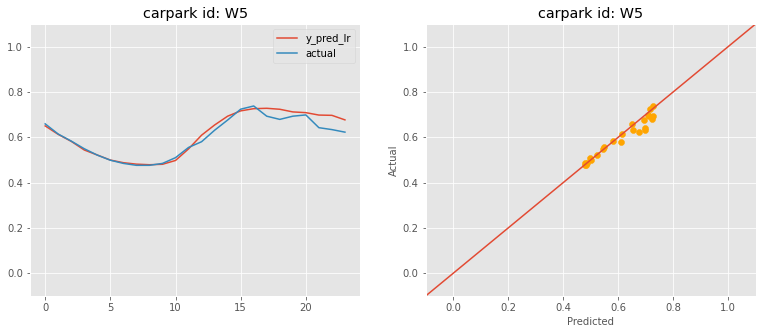

In [29]:
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
randomList = [random.randint(0,len(testY)) for i in range(10)]
print(f"randomList: {randomList}")

for i in randomList:
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.plot(y_pred_lr[i], label='y_pred_lr')
    plt.plot(testY[i], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(y_pred_lr[i], testY[i], label='y_pred_lr', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)


### Intepretation of model's performance
The LR model has a very high R Square value of 0.948 which indicates a good fit between predicted and actual value. It means that the output's variance can be very well explained by the variance in the input features.

The percentage error at 4.07% means that the predicted values are very close to the actual values.

From these metrics, it can be seen that LR is a fairly good model for this data distribution.

From the randomly selected scatter plots, we can see that the points are all very close to the line y=x, which means that the predicted availability is very close to the actual availability.

Thus, based on above evidence, the model is a good fit for our distribution. We have established that LR model is a good fit from Q2 and the above substantiation.

In [30]:
lr_r2 = metrics.r2_score(testY, y_pred_lr)
lr_mse = metrics.mean_squared_error(testY, y_pred_lr)
lr_abs_error = mean_absolute_error(testY, y_pred_lr)
print(f"Model's r2score: {lr_r2},\nMSE: {lr_mse},\Percentage Error: {lr_abs_error*100} %\n")

Model's r2score: 0.9480106634767015,
MSE: 0.005591564842698374,\Percentage Error: 4.0711792803509494 %



### Error vs Time graph
From the graphs below, we can see that our predictions are extremely accurate in the short run and we can see that mean absolute error plateaus at a low value that is less than 0.045. The mean squared error can also be seen increasing at a decreasing rate to about 0.65% at 20hrs after the keyed in time. Overall, the predictions are extremely accurate for the next 24hrs with its accuracy slowly dwindling 



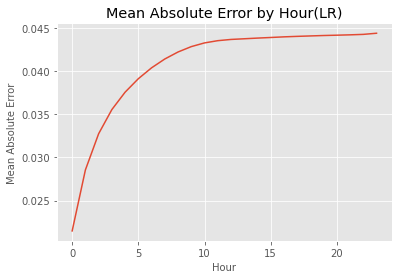

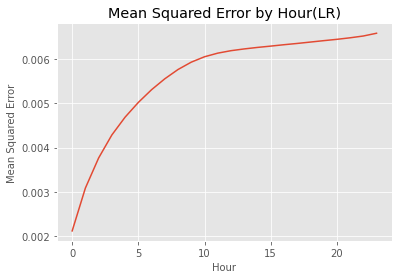

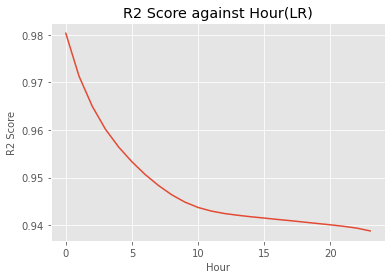

In [31]:
ae_by_hr = []
mse_by_hr = []
r2_by_hr = []
for i in range(24):
    # print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY[:,i], y_pred_lr[:,i])) )
    # print("               R2 Score is {}" .format(r2_score(testY[:,i], y_pred_lr[:,i])) )
    mse = mean_squared_error(testY[:,i], y_pred_lr[:,i])
    ae = mean_absolute_error(testY[:,i], y_pred_lr[:,i])
    r2 = r2_score(testY[:,i], y_pred_lr[:,i])
    # print("               Absolute Error is {}%" .format(100*ae))
    ae_by_hr.append(ae)
    mse_by_hr.append(mse)
    r2_by_hr.append(r2)
plt.plot(ae_by_hr)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(mse_by_hr)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(r2_by_hr)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()

# Model 3: LSTM

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [33]:
# reshape input to be [samples, time steps, features]
trainX1 = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX1 = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX2 = trainX1[2000:4000]
testX2 = testX1[2000:4000]
trainY2 = trainY[2000:4000]
testY2 = testY[2000:4000]
print(trainX.shape)
print(trainY.shape)

(874606, 192)
(874606, 24)


In [ ]:
# create and fit the LSTM network
modelX = Sequential()
modelX.add(LSTM(16, input_shape=(192,1), activation="relu"))
modelX.add(Dense(24))
modelX.compile(loss='mean_squared_error', optimizer='adam')
modelX.fit(trainX1, trainY, epochs=10, batch_size=128, verbose=2)

In [14]:
# Save the model
# model.save('models/lstm_tf_model.h5')
modelX.save('models/modelXX.h5')

In [35]:
loaded = tf.keras.models.load_model('models/modelXX.h5')
ypred_lstm = loaded.predict(testX2)
print(ypred_lstm.shape)
#show model info
# print(modelX.summary())
# print(testX[0].shape)
# modelX(testX1[0])

63/63 [==============================] - 1s 6ms/step
(2000, 24)


In [36]:
for i in range(24):
    print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY2[:,i], ypred_lstm[:,i])) )
#     print("               R2 Score is {}" .format(r2_score(testY2[:,i], ypred_lstm[:,i])) )

Hour0:   MSE is 0.004459564612523262
Hour1:   MSE is 0.008046152701482654
Hour2:   MSE is 0.01132684657994395
Hour3:   MSE is 0.013864122213335444
Hour4:   MSE is 0.015373712528063518
Hour5:   MSE is 0.016010303511563052
Hour6:   MSE is 0.015917913538206114
Hour7:   MSE is 0.015500554748791359
Hour8:   MSE is 0.014768843363983476
Hour9:   MSE is 0.01396588734652257
Hour10:   MSE is 0.013062980429540762
Hour11:   MSE is 0.012363824723474871
Hour12:   MSE is 0.011764255612466436
Hour13:   MSE is 0.01159499355441212
Hour14:   MSE is 0.011916507510277322
Hour15:   MSE is 0.012585210512653787
Hour16:   MSE is 0.013243366297812226
Hour17:   MSE is 0.013696104021547063
Hour18:   MSE is 0.01355609359086785
Hour19:   MSE is 0.012843527011679253
Hour20:   MSE is 0.011813597858168904
Hour21:   MSE is 0.010866446516944163
Hour22:   MSE is 0.010397484506694858
Hour23:   MSE is 0.01054560959179457


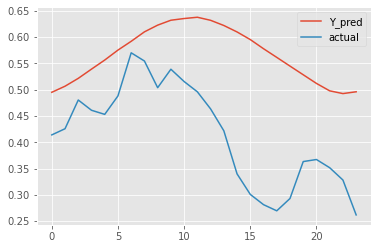

In [44]:
plt.plot(ypred_lstm[22], label='Y_pred')
plt.plot(testY[22], label='actual')
plt.legend()

Text(0, 0.5, 'Actual')

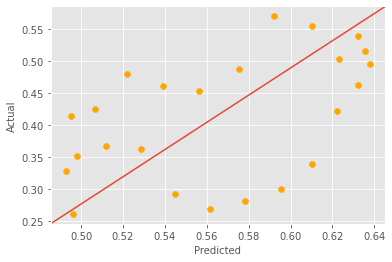

In [45]:
plt.scatter(ypred_lstm[22], testY[22], label='Y_pred', color='orange')
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)

# Overall Flow

In [46]:
from queue import PriorityQueue
from datetime import timedelta
import pickle
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import pandas as pd
import numpy as np
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")

from api_utils import getDataAtTimestamp, json2csv, postalcode2xy

### Helper methods to our app

In [47]:
def update_rencet_csv(time_now, recent):
    '''
    update recent data from API and store locally in a csv file
    '''
    range = timedelta(hours=191)
    start = time_now - range
    end = time_now
    for date in pd.date_range(start, end, freq='1h'):
        if date not in recent.index:
            recent.loc[date] = np.nan
            year, month, day, hour, mins = date.year, date.month, date.day, date.hour, date.minute+1
            try:
                raw_data = getDataAtTimestamp(str(year), str(month), str(day), str(hour), str(mins))
            except:
                continue
            raw_df = json2csv(raw_data, date)
            raw_df['lots_available'] = raw_df['lots_available'].astype(float)
            raw_df['total_lots'] = raw_df['total_lots'].astype(float)
            raw_df['available rate'] = raw_df['lots_available'] / raw_df['total_lots']
            for id in raw_df.carpark_number:
                if id in recent.columns:
                    recent.loc[date, id] = raw_df[raw_df.carpark_number == id]['available rate'].values[0]
                else:
                    print("Id not seen!")
    recent.to_csv("./data/recent.csv")

def find_nearest(x, y, location_dict) -> List[Tuple[float, str]]:
    '''
    Sort carparks by distance to the given location
    '''
    shortest = PriorityQueue()
    for key, (loc, addr) in location_dict.items():
        dist = (loc[0] - x)**2 + (loc[1] - y)**2
        shortest.put((-dist, key))
    size = shortest.qsize()
    res = [shortest.get() for i in range(size)]
    res.reverse()
    return res

def create_location_dict(loc_info: pd.DataFrame) -> Dict[str, Tuple[Tuple[float, float], str]]:
    '''
    Create a dictionary of carparks' location and address with carpark number as key
    '''
    location_dict = {}
    for row in loc_info.iterrows():
        content = row[1]
        name = content[0]
        addr = content[1]
        location = (content[2], content[3])
        location_dict[name] = (location, addr)
    return location_dict

def init():
    '''
    Initialize the app data, including recent data, location dictionary and model
    '''
    model = pickle.load(open('models/mlp_sklearn_model.sav', 'rb'))
    print(colored("Model loaded!", "green"))
    recent = pd.read_csv("./data/recent.csv")
    recent['timestamp'] = pd.to_datetime(recent['timestamp'])
    recent = recent.set_index('timestamp')
    print(colored("Recent data loaded!", "green"))
    loc_info = pd.read_csv("./data/hdb-carpark-information.csv")
    location_info = create_location_dict(loc_info)
    return model, recent, location_info

def get_pred_inputs(recent: pd.DataFrame, id: str):
    '''
    Get the inputs for the model from the recent data based on the carpark number
    '''
    time_now = pd.Timestamp.now()
    time_now = time_now.floor('1h')
    range = timedelta(hours=191)
    if time_now not in recent.index:
        print(colored("Updating recent data! Please wait", "green"))
        update_rencet_csv(time_now, recent)
    most_recent = recent[id][time_now - range: time_now]
    return most_recent.values.reshape(1, -1)

def find_by_location(model,
                                    recent: pd.DataFrame,
                                    carpark_info: Dict[str, Tuple[Tuple[float, float], str]],
                                    x, y):
    """
    Find the nearest 5 carparks to the given location and predict the available rate
    """
    print(colored("Finding nearest carpark...", "green"))
    top5 = find_nearest(x, y, carpark_info)
    res = []
    for ele in top5:
        id = ele[1]
        if id not in recent.columns:
            print(f"We do not have data for the nearby carpark {id}")
            continue
        input = get_pred_inputs(recent, id)
        prediction = model.predict(input)[0]
        res.append((ele[0], ele[1], prediction))
        if (len(res) == 5):
            break
    return res

### main app flow

In [48]:
def app():
    model, recent, location_dict = init()
    print("* Welcome to the carpark availability prediction system")
    print("* Where would you like to go?")

    while True:
        postal_code = input("Enter your destination postal code: ")
        print(postal_code)
        try:
            x, y = postalcode2xy(postal_code)
            best_options = find_by_location(model, recent, location_dict, x, y)
            break
        except:
            print(colored("Invalid Postal Code! Please Try Again", "red"))

    print(colored("Best options is:"))
    print(colored(f"carpark {best_options[0][1]} with distance {-best_options[0][0]}", 'yellow'))
    print(colored("Alternatives are:"))
    for ele in best_options[1:]:
        print(colored(f"carpark {ele[1]} with distance {-ele[0]}"))

    time_now = pd.Timestamp.now()
    time_now = time_now.ceil('1h')
    ranges = [(time_now + timedelta(hours=i)).time() for i in range(0,24,4)]
    print(ranges)
    fig, axs = plt.subplots(min(5, len(best_options)+1), 1, figsize=(10, 25))
    for i in range(len(best_options)):
        axs[i].plot(best_options[i][2])
        axs[i].set_xticks(range(0, 24, 4))
        axs[i].set_xticklabels(ranges)
        axs[i].set_ylim(0, 1)
        axs[i].set_title(f"carpark at {location_dict[best_options[i][1]][1]}\n Distance {-best_options[i][0]}",fontsize=10)
    plt.show()


### Run the app

Model loaded!
Recent data loaded!
* Welcome to the carpark availability prediction system
* Where would you like to go?
Enter your destination postal code: 123232
123232
Invalid Postal Code! Please Try Again
Enter your destination postal code: 138600
138600
Finding nearest carpark...
Best options is:
carpark C3M with distance 427263.02948714676
Alternatives are:
carpark C3ML with distance 606583.3338573483
carpark C4M with distance 610861.7729772844
carpark C33 with distance 629935.6217044649
carpark AR2L with distance 647373.7372743348
[datetime.time(20, 0), datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0)]


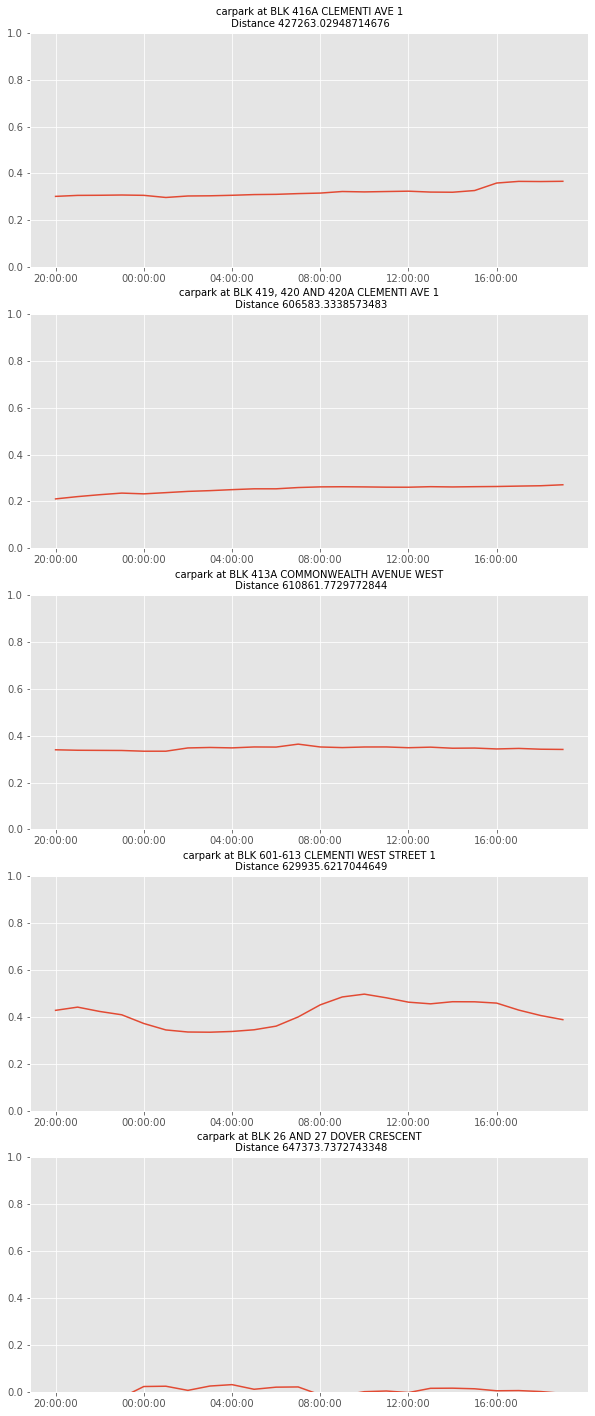

In [50]:
app()